In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

original repo
https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

In [8]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# datapath = Path() / "data" / "housing"
datapath = Path("data/housing")
housing = pd.read_csv( datapath / "housing.csv")

In [9]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
housing.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


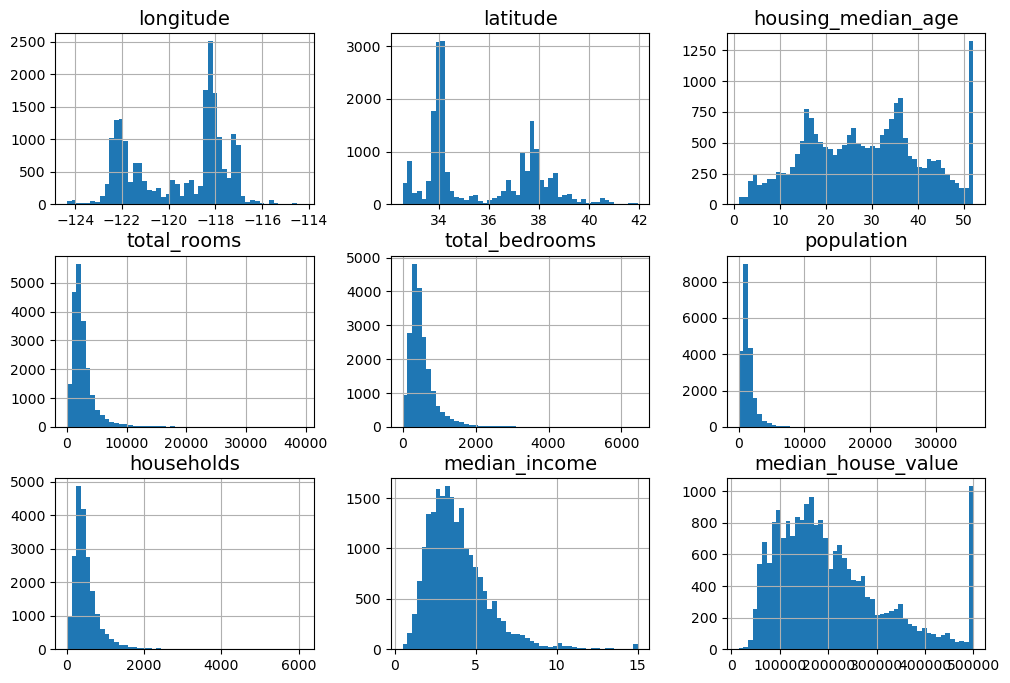

In [14]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
housing["income cat"] = pd.cut(housing["median_income"],
                                bins=[0., 1.5, 3., 4.5, 6., np.inf],
                                labels=[1, 2, 3, 4, 5])

In [17]:
housing["income cat"].value_counts()

income cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

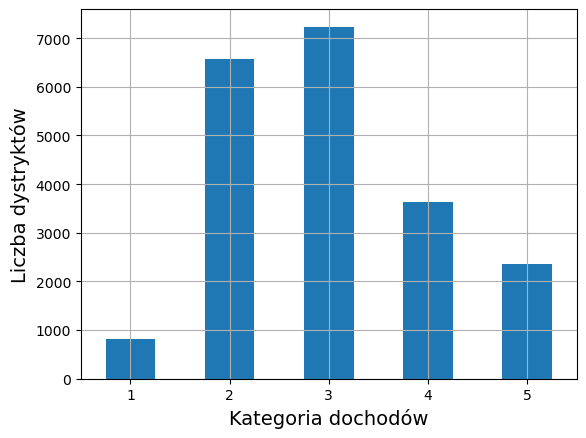

In [18]:
housing["income cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Kategoria dochodów")
plt.ylabel("Liczba dystryktów")
plt.show()

In [19]:
df_train_rand_samp, df_test_rand_samp = train_test_split(
    housing, test_size=0.2, random_state=42)
df_train, df_test = train_test_split(
    housing, test_size=0.2, stratify=housing["income cat"], random_state=42)


In [20]:
def income_cat_proportions(data):
    return data["income cat"].value_counts() / len(data)

compare_samp = pd.DataFrame({
    "Łącznie %": income_cat_proportions(housing),
    "Warstwowe %": income_cat_proportions(df_test),
    "Losowe %": income_cat_proportions(df_test_rand_samp),
}).sort_index()

In [21]:
compare_samp.index.name = "Kategoria dochodów"
compare_samp["Błąd - warstwowe %"] = (compare_samp["Warstwowe %"] / compare_samp["Łącznie %"] -1)
compare_samp["Błąd - losowe 5"] = (compare_samp["Losowe %"] / compare_samp["Łącznie %"] -1)
(compare_samp * 100).round(2)

,Łącznie %,Warstwowe %,Losowe %,Błąd - warstwowe %,Błąd - losowe 5
Kategoria dochodów,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [22]:
for set in (df_train, df_test):
    set.drop("income cat", axis=1, inplace=True)

In [23]:
df_train_eda = df_train.copy()

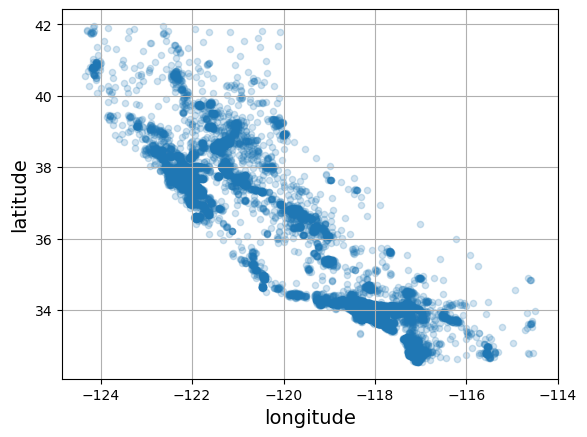

In [24]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

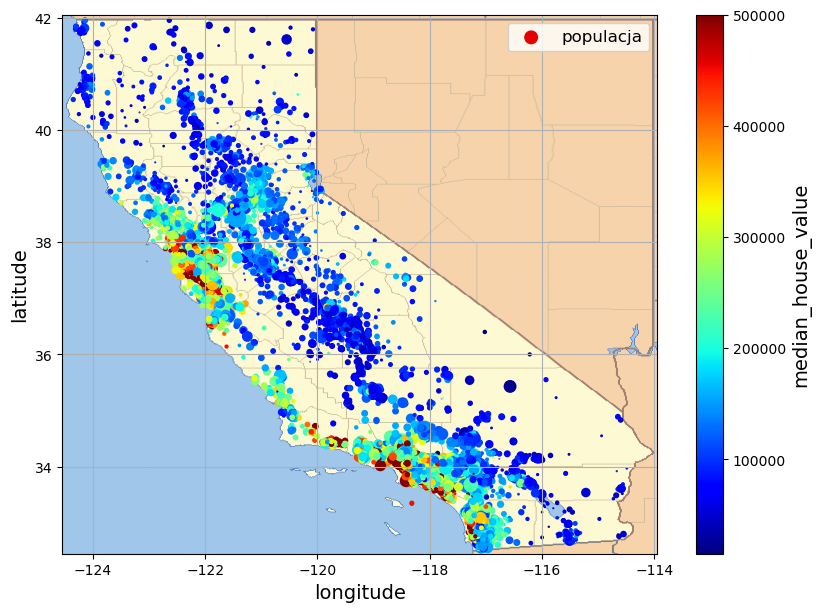

In [25]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
                  s=df_train_eda["population"] / 100, label="populacja", 
                  c="median_house_value", cmap="jet", colorbar=True,
                  legend=True, sharex=False, figsize=(10,7)
                  )
california_img = plt.imread(datapath / "california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

COŚ NOWEGO do KORELACJI

In [26]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [28]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


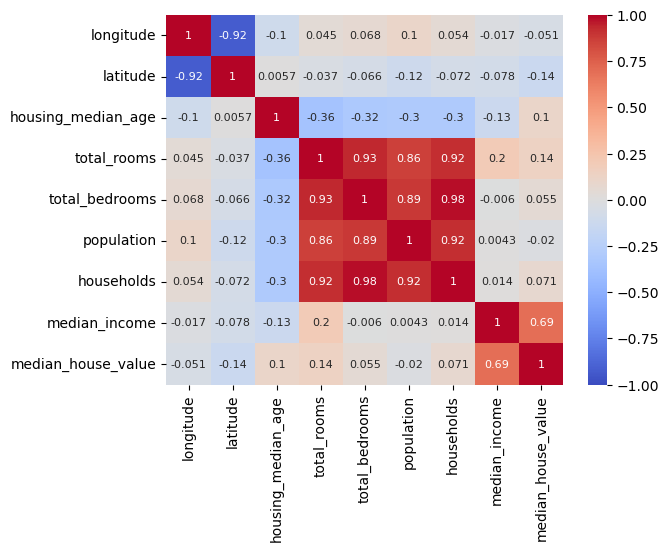

In [29]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8}, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()


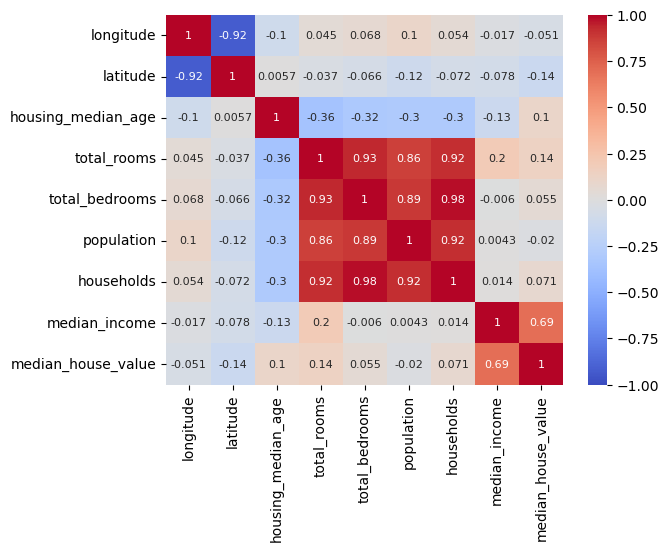

In [30]:
# Spearman correlation
corr_matrix_spearman = df_train_eda.select_dtypes(np.number).corr(method="spearman")
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8}, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

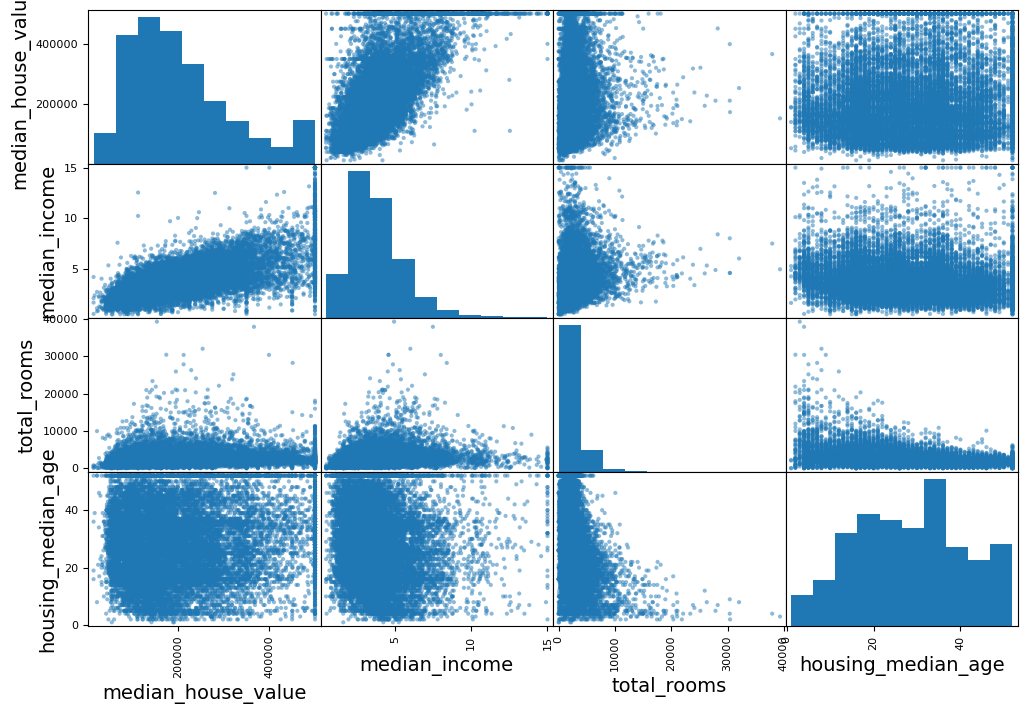

In [31]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income","total_rooms","housing_median_age"]
scatter_matrix(df_train_eda[attributes], figsize=(12, 8)) 
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

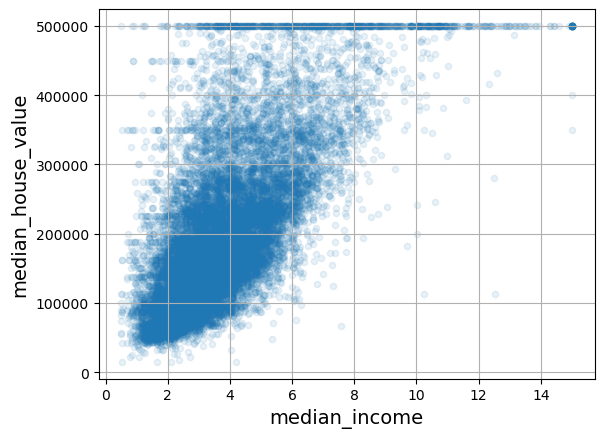

In [32]:
df_train_eda.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)

In [33]:
df_train_eda["pokoje_na_rodzine"] = df_train_eda["total_rooms"] / df_train_eda["households"]
df_train_eda["współczynnik_sypialni"] = df_train_eda["total_bedrooms"] / df_train_eda["total_rooms"]
df_train_eda["liczba_osób_na_dom"] = df_train_eda["population"] / df_train_eda["households"]

In [34]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value       1.000000
median_income            0.688380
pokoje_na_rodzine        0.143663
total_rooms              0.137455
housing_median_age       0.102175
households               0.071426
total_bedrooms           0.054635
population              -0.020153
liczba_osób_na_dom      -0.038224
longitude               -0.050859
latitude                -0.139584
współczynnik_sypialni   -0.256397
Name: median_house_value, dtype: float64

In [35]:
X_train = df_train.drop("median_house_value", axis=1)
Y_train = df_train["median_house_value"].copy()

OCZYSZCZANIE

In [36]:
df_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [37]:
# po użyciu tego następna komurka będzie pusta

X_train.dropna(subset=["total_bedrooms"], inplace=True) # rozwiązanie 1

X_train.drop("total_bedrooms", axis=1) # roziwązanie 2 (gdy nie ma jakieś połowy wartości zmiennej)

median = X_train["total_bedrooms"].median()  # rozw 3
X_train["total_bedrooms"].fillna(median, inplace=True)

In [38]:
null_rows_idx = X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [39]:
X_train_optional = X_train.copy()

X_train_optional.dropna(subset=["total_bedrooms"], inplace=True)

X_train_optional.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [40]:
null_rows_idx = X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [41]:
X_train_option1 = X_train.copy()

X_train_option1.dropna(subset=["total_bedrooms"], inplace=True) # rozwiazanie 1.

X_train_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [42]:
X_train_option2 = X_train.copy()

X_train_option2.drop("total_bedrooms", axis=1) # rozwiazanie 2

X_train_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [43]:

# najmniej destrukcyjne
X_train_option3 = X_train.copy()

median = X_train_option3["total_bedrooms"].median() # rozwiazanie 3
X_train_option3["total_bedrooms"].fillna(median, inplace=True)

X_train_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [44]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [45]:

X_train_num = X_train.select_dtypes(include=[np.number])

In [46]:
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

In [48]:
X_train_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

In [49]:

X = imputer.transform(X_train_num)
#aplikuje mediany wyliczone przez imputer.fit do wartosci pustych

In [50]:

X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [51]:
X_train_tr = pd.DataFrame(X, columns=X_train_num.columns, index=X_train_num.index)

X_train_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [52]:
X_train_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [53]:
imputer = SimpleImputer(strategy="median").set_output(transform="pandas")
X = imputer.fit_transform(X_train_num)

In [54]:
X = imputer.transform(X_train_num)

In [55]:
X.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


<!-- STH -->

In [56]:
X_train_cat = X_train[["ocean_proximity"]]
X_train_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [57]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder().set_output(transform="pandas")
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)

In [58]:
X_train_cat_encoded.head()

,ocean_proximity
13096,3.0
14973,0.0
3785,1.0
14689,1.0
20507,4.0


In [59]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder_default = OneHotEncoder().set_output(transform="default")
X_train_cat_1hot_default = cat_encoder_default.fit_transform(X_train_cat)
X_train_cat_1hot_default

<16344x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16344 stored elements in Compressed Sparse Row format>

In [60]:
X_train_cat_1hot_default.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [61]:
cat_encoder =  OneHotEncoder(sparse_output=False).set_output(transform="pandas")
X_train_cat_1hot_df = cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


In [62]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [63]:
sample_df = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
sample_df


,ocean_proximity
0,INLAND
1,NEAR BAY


In [64]:
pd.get_dummies(sample_df)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [65]:
cat_encoder.transform(sample_df)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0


In [66]:
sample_unknown_df = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(sample_unknown_df)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [67]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(sample_unknown_df)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


In [68]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [69]:
cat_encoder_default.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [70]:
df_output = pd.DataFrame(X_train_cat_1hot_default.toarray(),
    columns=cat_encoder_default.get_feature_names_out(),
    index=X_train_cat.index
)
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


SKALOWANIE CECH

In [71]:
X_train_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000
mean,-119.573766,35.638384,28.574523,2640.951787,538.949094,1425.321708,499.931596,3.872020
std,2.000740,2.133681,12.590076,2189.105543,423.862079,1095.299025,382.655656,1.891485
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.500000,434.000000,1167.000000,408.500000,3.540900
75%,-118.010000,37.720000,37.000000,3152.000000,645.000000,1724.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [72]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)).set_output(transform="pandas")
X_train_min_max_scaled = min_max_scaler.fit_transform(X_train_num)

In [73]:
X_train_min_max_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000
mean,-0.031190,-0.342897,0.081354,-0.865764,-0.826720,-0.825503,-0.813727,-0.534886
std,0.405830,0.453975,0.493728,0.111354,0.136532,0.134376,0.142862,0.260891
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.482759,-0.706383,-0.333333,-0.926344,-0.904977,-0.903815,-0.895837,-0.715507
50%,0.184584,-0.636170,0.098039,-0.891983,-0.860525,-0.857195,-0.847863,-0.580558
75%,0.286004,0.100000,0.411765,-0.839768,-0.792559,-0.788860,-0.775247,-0.413787
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().set_output(transform="pandas")
X_train_min_max_scaled = std_scaler.fit_transform(X_train_num)

In [75]:
X_train_min_max_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.634400e+04,1.634400e+04,1.634400e+04,1.634400e+04,1.634400e+04,1.634400e+04,1.634400e+04,1.634400e+04
mean,-4.057775e-15,9.742574e-16,6.955876e-17,4.521319e-17,2.391082e-17,7.651464e-17,7.260196e-17,1.738969e-18
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-2.387307e+00,-1.447488e+00,-2.190246e+00,-1.205530e+00,-1.269200e+00,-1.298609e+00,-1.303906e+00,-1.782845e+00
25%,-1.112739e+00,-8.006987e-01,-8.399351e-01,-5.440524e-01,-5.731971e-01,-5.828009e-01,-5.747683e-01,-6.923451e-01
50%,5.317025e-01,-6.460317e-01,3.379569e-02,-2.354695e-01,-2.476096e-01,-2.358530e-01,-2.389469e-01,-1.750636e-01
75%,7.816178e-01,9.756285e-01,6.692362e-01,2.334578e-01,2.502091e-01,2.726994e-01,2.693585e-01,4.641892e-01
max,2.541021e+00,2.958178e+00,1.860687e+00,1.675578e+01,1.337988e+01,1.358545e+01,1.269605e+01,5.883431e+00


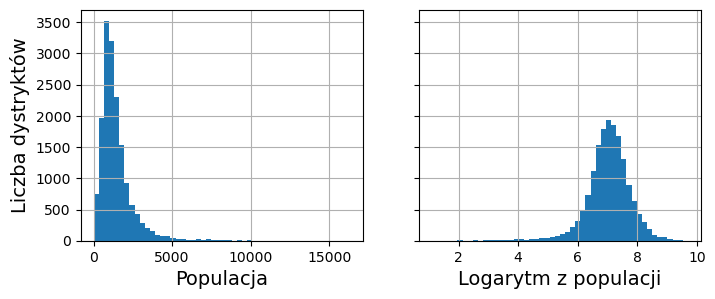

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(8,3 ), sharey=True)
X_train["population"].hist(ax=axs[0], bins= 50)
X_train["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Populacja")
axs[1].set_xlabel("Logarytm z populacji")
axs[0].set_ylabel("Liczba dystryktów")
plt.show()


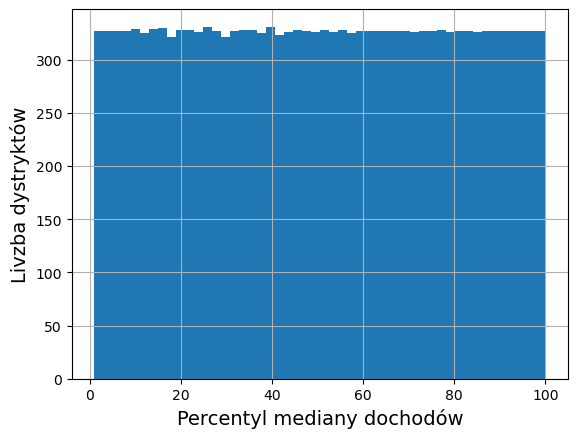

In [77]:
percentiles = [np.percentile(X_train["median_income"], p)
                for p in range(1, 100)]
X_train["median_income_percentile"] = pd.cut(X_train["median_income"],
                                                bins=[-np.inf] + percentiles + [np.inf], labels=range(1,100+1))

X_train["median_income_percentile"] = X_train["median_income_percentile"].astype(int)
X_train["median_income_percentile"].hist(bins=50)
plt.xlabel("Percentyl mediany dochodów")
plt.ylabel("Livzba dystryktów")
plt.show()
# Rzeczy poniżej 1 percentyla liczą się jako 1 a powyżej 99 jako 100

In [78]:
X_train.drop("median_income_percentile", axis=1, inplace=True)

<Axes: >

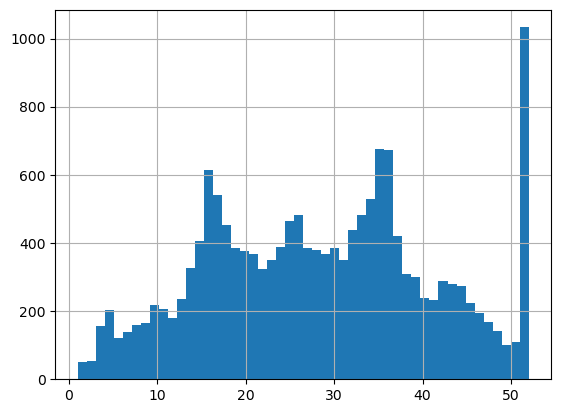

In [79]:
X_train["housing_median_age"].hist(bins=50)

In [80]:
from sklearn.metrics.pairwise import rbf_kernel

X_train["age_simil_35_v1"] = rbf_kernel(
    X_train[["housing_median_age"]], [[35]], gamma=0.1)

X_train["age_simil_35_v2"] = rbf_kernel(
    X_train[["housing_median_age"]], [[35]], gamma=0.03)


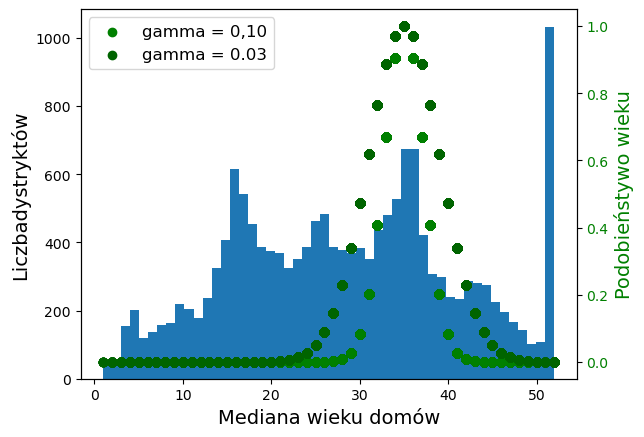

In [81]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Mediana wieku domów")
ax1.set_ylabel("Liczbadystryktów")
ax1.hist(X_train["housing_median_age"], bins=50)

ax2 = ax1.twinx()
ax2.scatter(
    X_train["housing_median_age"], X_train["age_simil_35_v1"],
    color = "green", label = "gamma = 0,10"
)

ax2.scatter(
    X_train["housing_median_age"], X_train["age_simil_35_v2"],
    color = "darkgreen", label = "gamma = 0.03"
)
ax2.tick_params(axis="y", labelcolor="green")
ax2.set_ylabel("Podobieństywo wieku", color="green")
plt.legend(loc="upper left")
plt.show()

In [82]:
X_train.drop({"age_simil_35_v1", "age_simil_35_v2"}, axis=1, inplace=True)

In [84]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(Y_train.to_frame())

model = LinearRegression()
model.fit(X_train[["median_income"]], scaled_labels)
some_new_data = X_train[["median_income"]].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

ValueError: Found input variables with inconsistent numbers of samples: [16344, 16512]

In [ ]:
predictions

In [ ]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), 
                                   transformer=StandardScaler())

model.fit(X_train[["median_income"]], Y_train)
predictions = model.predict(some_new_data)

In [ ]:
predictions

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(X_train[["population"]])

In [ ]:
log_pop


In [ ]:

rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [ ]:

age_simil_35

In [ ]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])
sf_simil

In [ ]:
sample_array = np.array([[1., 2.], [3., 4.]])
sample_array

In [ ]:

ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(sample_array)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [ ]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(X_train[["latitude", "longitude"]],
                                           sample_weight=Y_train)

In [ ]:
similarities[:3].round(2)


In [ ]:
x_train_renamed = X_train.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
x_train_renamed["Max cluster similarity"] = similarities.max(axis=1)

x_train_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=x_train_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# tu kod z jednych zajęć

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(starategy="median")),
    ("standarize", StandardScaler())
])

In [ ]:
from sklearn import set_config

set_config(display="diagram")

num_pipeline

In [ ]:

from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline

In [ ]:
X_train_num_prepared = num_pipeline.fit_transform(X_train_num)
X_train_num_prepared_df = pd.DataFrame(
    X_train_num_prepared,
    columns = num_pipeline.get_feature_names_out(),
    index = X_train_num.index
)
X_train_num_prepared_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.634400e+04,1.634400e+04,1.634400e+04,1.634400e+04,1.634400e+04,1.634400e+04,1.634400e+04,1.634400e+04
mean,-4.057775e-15,9.742574e-16,6.955876e-17,4.521319e-17,2.391082e-17,7.651464e-17,7.260196e-17,1.738969e-18
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-2.387307e+00,-1.447488e+00,-2.190246e+00,-1.205530e+00,-1.269200e+00,-1.298609e+00,-1.303906e+00,-1.782845e+00
25%,-1.112739e+00,-8.006987e-01,-8.399351e-01,-5.440524e-01,-5.731971e-01,-5.828009e-01,-5.747683e-01,-6.923451e-01
50%,5.317025e-01,-6.460317e-01,3.379569e-02,-2.354695e-01,-2.476096e-01,-2.358530e-01,-2.389469e-01,-1.750636e-01
75%,7.816178e-01,9.756285e-01,6.692362e-01,2.334578e-01,2.502091e-01,2.726994e-01,2.693585e-01,4.641892e-01
max,2.541021e+00,2.958178e+00,1.860687e+00,1.675578e+01,1.337988e+01,1.358545e+01,1.269605e+01,5.883431e+00


In [ ]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [ ]:
num_pipeline[1]

StandardScaler()

In [ ]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [ ]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [ ]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "h=ousaeholds", "medina_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preporocessing = ColumnTransformer({
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
})

NameError: name 'make_pipeline' is not defined

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preporocessing = make_column_transformer({
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
})

preporocessing

NameError: name 'num_pipeline' is not defined

In [ ]:
X_train_prepared = preporocessing.fit_transform(X_train)

NameError: name 'preporocessing' is not defined

In [ ]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median")
)

NameError: name 'make_pipeline' is not defined